In [1]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Pig:
    """Responsibilities:
    - Establish a number of turns
    - Count turns
    - Roll a die
    - Checks for end of game
    - Keeps score
    - process roll results"""
    def __init__(self, turns = 7):
        self.turns = turns
        self.reset()
        
    def reset(self):    
        self.turn = 0
        self.score = 0
    
    def roll(sides=6):
        return (random.randint(1, 6))
    
    def game_on(self):
        if self.turn < self.turns:
            return True
        else:
            return False
        
    def inc_turn(self):
        self.turn += 1

In [3]:
class Player:
    """Responsibilities:
    - Takes turns, makes decision with
    - Processes results
    - Decides course of action
    
    Collaborator:
    - Pig
    """

    def __init__(self, game = Pig()):
        self.game = game
        self.reset()
        
    def reset(self):
        self.score = 0
        self.game.reset()

    
    def turn(self):
        result = self.game.roll()
        if result < 1:
            return 0
        return result
    
    
    def match(self):
        self.reset()
        while self.game.game_on():
            self.game.score += self.turn()
            #print(self.get_score())
            self.game.inc_turn()
        return self.get_score()
            

    def get_score(self):
        return self.game.score

In [37]:
data1 = [Player().match() for _ in range(100000)]
one_roll_avg = sum(data1)/100000

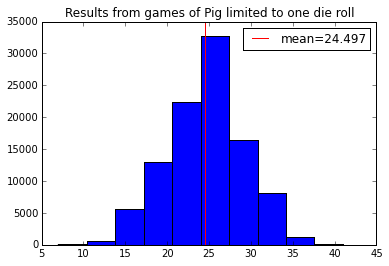

In [38]:
plt.hist(data1)
plt.title("Results from games of Pig limited to one die roll")
ymin, ymax = plt.ylim()
plt.vlines(one_roll_avg, ymin, ymax, color="red", label="mean="+str(round(one_roll_avg, 3)))
plt.legend()
plt.show()

## Basic dice game

For our initial data for games of Pig we only allowed one roll for each of 7 turns.  Across 100,000 games, our average total was approximately 24.5

In [4]:
class PlayerRolls(Player):
    def __init__(self, max_roll=1):
        super().__init__()
        self.max_roll = max_roll
        
    def turn(self):
        curr_tally = 0
        curr_roll = 0
        while curr_roll < self.max_roll:
                result = self.game.roll()
                if result > 1:
                    curr_tally += result
                else:
                    return 0
                curr_roll += 1
        return curr_tally

In [39]:
itr = 100000
data = [sum([PlayerRolls(x).match() for _ in range(itr)])/itr for x in range(1,9)]
print(data)

[23.36186, 38.86005, 48.57064, 54.03465, 56.22876, 56.23462, 54.77879, 52.20813]


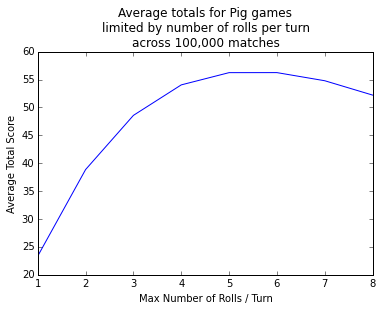

In [40]:
plt.plot(range(1,9), data)
plt.title("Average totals for Pig games\nlimited by number of rolls per turn\nacross 100,000 matches")
plt.xticks(range(1,9))
plt.xlabel("Max Number of Rolls / Turn")
plt.ylabel("Average Total Score")
plt.show()

## Pig games for several max rolls per turn

Our next step was to simulate 100,000 matches with roll limits ranging from 1 through 8.  Based on this data, the ideal limit for rolls per turn is either 5 or 6.  Difference in other parameters should be investigated.

In [9]:
class PlayerTally(Player):
    def __init__(self, max_tally = 6):
        super().__init__()
        self.max_tally = max_tally

    def turn(self):
        curr_tally = 0
        while curr_tally < self.max_tally:
                result = self.game.roll()
                if result > 1:
                    curr_tally += result
                else:
                    return 0
        return curr_tally

In [19]:
itr_t = 100000
range_t = range(16,25)
data_t = [sum([PlayerTally(x).match() for _ in range(itr_t)])/itr_t for x in range_t]

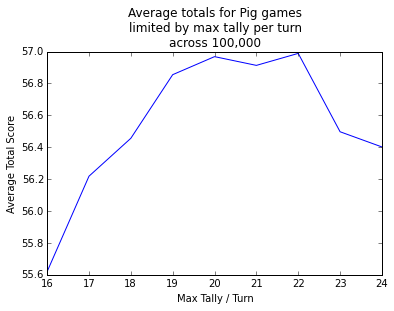

In [21]:
plt.plot(range_t, data_t)
plt.title("Average totals for Pig games\nlimited by max tally per turn\nacross 100,000 matches")
plt.xticks(range_t)
plt.xlabel("Max Tally / Turn")
plt.ylabel("Average Total Score")
plt.show()

## Pig games for several max tallies per turn

Next we simulated 100,000 matches with tally limits eventually ranging from 16 through 24. Based on this data, the ideal limit for tally in a turn is between 20 and 22. Difference in other parameters should be investigated.

In [24]:
class PlayerRollsTally(PlayerRolls):
    def __init__(self, max_rolls=1, max_tally=6):
        super().__init__(max_rolls)
        self.max_tally = max_tally 
        
    def turn(self):
        curr_tally = 0
        curr_roll = 0
        while curr_tally < self.max_tally and curr_roll < self.max_roll:
                result = self.game.roll()
                if result > 1:
                    curr_tally += result
                else:
                    return 0
                curr_roll += 1
        return curr_tally

In [35]:
itr_rt = 100000
range_r5t = range(18,27)
data_r5t = [sum([PlayerRollsTally(5, x).match() for _ in range(itr_rt)])/itr_rt for x in range_r5t]

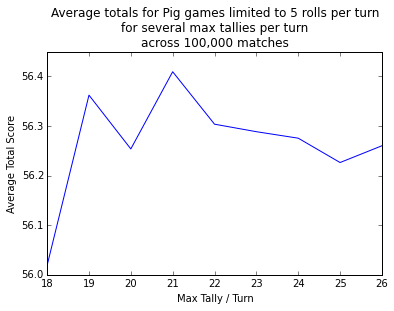

In [36]:
plt.plot(range_r5t, data_r5t)
plt.title("Average totals for Pig games limited to 5 rolls per turn\nfor several max tallies per turn\nacross 100,000 matches")
plt.xticks(range_r5t)
plt.xlabel("Max Tally / Turn")
plt.ylabel("Average Total Score")
plt.show()

In [33]:
range_r6t = range(18,24)
data_r6t = [sum([PlayerRollsTally(6, x).match() for _ in range(itr_rt)])/itr_rt for x in range_r6t]

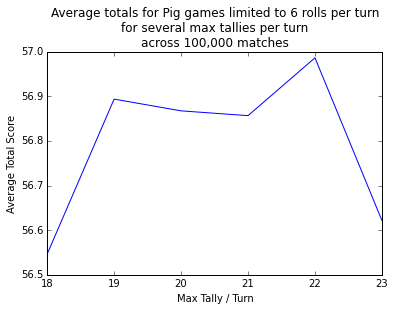

In [34]:
plt.plot(range_r6t, data_r6t)
plt.title("Average totals for Pig games limited to 6 rolls per turn\nfor several max tallies per turn\nacross 100,000 matches")
plt.xticks(range_r6t)
plt.xlabel("Max Tally / Turn")
plt.ylabel("Average Total Score")
plt.show()

## Limiting by 5 and 6 rolls for various

From this data limiting by both number of rolls and max tally doesn't seem to beat the average high of approximately 57 that can be achieved from one or the other.  It may be worth pitching the two strategies against each other.